# Нейронные сети

In [2]:
# !pip install pandas
# !pip install numpy
# !pip install seaborn
# !pip install matplotlib
# !pip install sklearn
# !pip install keras
# !pip install tensorflow

In [3]:
from keras import models, layers

import tensorflow.experimental.numpy as tnp
tnp.experimental_enable_numpy_behavior()

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

from data_from_previous_practice import get_data_short, TEST_SIZE, FINAL_PRECISION

print(tf.config.list_physical_devices())
GPU = '/GPU:0'

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [4]:
# model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [5]:
model = models.Sequential(name='fish_sequential')

model.add(Input(shape=(2,)))
model.add(layers.Dense(2048, activation='softmax'))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(4, activation='sigmoid'))

opt =tf.optimizers.Adam(1e-5)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "fish_sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2048)              6144      
                                                                 
 dense_1 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_2 (Dense)             (None, 64)                65600     
                                                                 
 dense_3 (Dense)             (None, 1024)              66560     
                                                                 
 dense_4 (Dense)             (None, 4)                 4100      
                                                                 
Total params: 2,240,580
Trainable params: 2,240,580
Non-trainable params: 0
_________________________________________________________________


In [11]:
data, ident, x_test, y_test = get_data_short()
t = to_categorical(ident)
# print(ident[0:3])
# print(t[0:3])
type(x_test)

numpy.ndarray

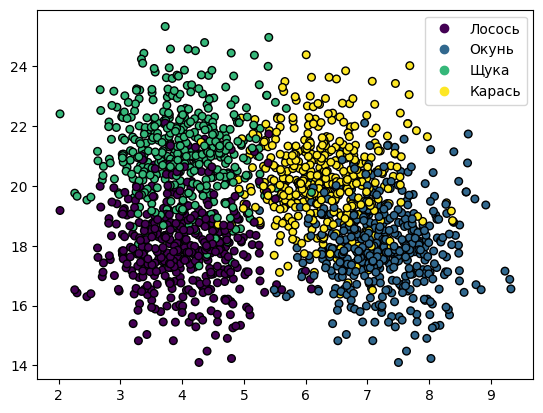

array([[ 7.76924826, 17.80250259],
       [ 3.49947319, 18.73633768],
       [ 3.0332108 , 17.70977285],
       ...,
       [ 6.33216782, 20.4647536 ],
       [ 6.70787454, 21.65070181],
       [ 3.77002975, 20.00975423]])

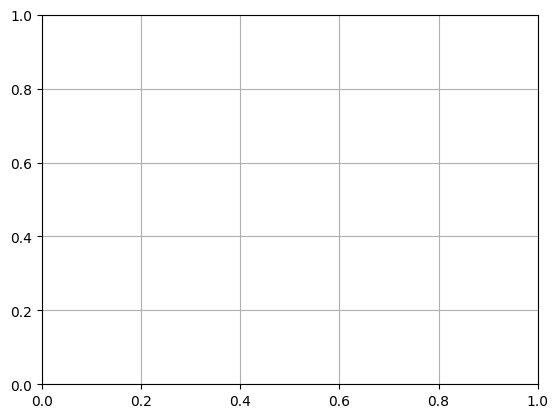

In [12]:
scatter = plt.scatter(data[:, 0], data[:, 1], c=ident, edgecolors="black", s=30)
handles = scatter.legend_elements()[0]
plt.legend(handles, ['Лосось','Окунь','Щука','Карась'])
plt.show()
plt.grid()
data

In [8]:
def get_exact_epochs():
    print(f'Нужная точность - {FINAL_PRECISION}')
    e = 0
    while True:
        e += 1
        with tf.device(GPU):
            model.fit(data, t, epochs=e, batch_size=1, verbose=1)
        print(f'Точность по итогу эпох - {model.evaluate(data, t)[1]:.3f}')
        if model.evaluate(data, t)[1] > FINAL_PRECISION:
            return e

In [9]:
with tf.device(GPU):
    model.fit(data, t, epochs=get_exact_epochs(), batch_size=1, verbose=1)
model.evaluate(data, t)

Нужная точность - 0.839
56/56 [==============================] - 0s 2ms/step - loss: 1.3859 - accuracy: 0.2500
Точность по итогу эпох - 0.250
56/56 [==============================] - 0s 2ms/step - loss: 1.3859 - accuracy: 0.2500
Epoch 1/2
1772/1772 [==============================] - 4s 2ms/step - loss: 1.3855 - accuracy: 0.2957
Epoch 2/2
56/56 [==============================] - 0s 2ms/step - loss: 1.3804 - accuracy: 0.3809
Точность по итогу эпох - 0.381
56/56 [==============================] - 0s 2ms/step - loss: 1.3804 - accuracy: 0.3809
Epoch 1/3
1772/1772 [==============================] - 4s 2ms/step - loss: 1.3748 - accuracy: 0.5186
Epoch 2/3
1772/1772 [==============================] - 4s 2ms/step - loss: 1.3489 - accuracy: 0.6010
Epoch 3/3
56/56 [==============================] - 0s 2ms/step - loss: 1.2379 - accuracy: 0.5717
Точность по итогу эпох - 0.572
56/56 [==============================] - 0s 2ms/step - loss: 1.2379 - accuracy: 0.5717
Epoch 1/4
1772/1772 [=================

1772/1772 [==============================] - 4s 2ms/step - loss: 0.6112 - accuracy: 0.7331
Epoch 7/11
1772/1772 [==============================] - 4s 2ms/step - loss: 0.6099 - accuracy: 0.7297
Epoch 8/11
1772/1772 [==============================] - 4s 2ms/step - loss: 0.6120 - accuracy: 0.7240
Epoch 9/11
1772/1772 [==============================] - 4s 2ms/step - loss: 0.6118 - accuracy: 0.7218
Epoch 10/11
1772/1772 [==============================] - 4s 2ms/step - loss: 0.6120 - accuracy: 0.7342
Epoch 11/11
56/56 [==============================] - 0s 2ms/step - loss: 0.6067 - accuracy: 0.7348
Точность по итогу эпох - 0.735
56/56 [==============================] - 0s 2ms/step - loss: 0.6067 - accuracy: 0.7348
Epoch 1/12
1772/1772 [==============================] - 4s 2ms/step - loss: 0.6104 - accuracy: 0.7274
Epoch 2/12
1772/1772 [==============================] - 4s 2ms/step - loss: 0.6117 - accuracy: 0.7212
Epoch 3/12
1772/1772 [==============================] - 4s 2ms/step - loss: 0.6

1772/1772 [==============================] - 4s 2ms/step - loss: 0.5983 - accuracy: 0.7376
Epoch 12/16
1772/1772 [==============================] - 4s 2ms/step - loss: 0.5972 - accuracy: 0.7342
Epoch 13/16
1772/1772 [==============================] - 4s 2ms/step - loss: 0.5983 - accuracy: 0.7353
Epoch 14/16
1772/1772 [==============================] - 4s 2ms/step - loss: 0.5955 - accuracy: 0.7376
Epoch 15/16
1772/1772 [==============================] - 4s 2ms/step - loss: 0.5963 - accuracy: 0.7381
Epoch 16/16
56/56 [==============================] - 0s 2ms/step - loss: 0.6042 - accuracy: 0.7319
Точность по итогу эпох - 0.732
56/56 [==============================] - 0s 2ms/step - loss: 0.6042 - accuracy: 0.7319
Epoch 1/17
1772/1772 [==============================] - 4s 2ms/step - loss: 0.5935 - accuracy: 0.7404
Epoch 2/17
1772/1772 [==============================] - 4s 2ms/step - loss: 0.5944 - accuracy: 0.7381
Epoch 3/17
1772/1772 [==============================] - 4s 2ms/step - loss: 

1772/1772 [==============================] - 4s 2ms/step - loss: 0.3997 - accuracy: 0.8335
Epoch 14/20
1772/1772 [==============================] - 4s 2ms/step - loss: 0.3991 - accuracy: 0.8273
Epoch 15/20
1772/1772 [==============================] - 4s 2ms/step - loss: 0.3960 - accuracy: 0.8335
Epoch 16/20
1772/1772 [==============================] - 4s 2ms/step - loss: 0.3949 - accuracy: 0.8397
Epoch 17/20
1772/1772 [==============================] - 4s 2ms/step - loss: 0.3928 - accuracy: 0.8290
Epoch 18/20
1772/1772 [==============================] - 4s 2ms/step - loss: 0.3935 - accuracy: 0.8358
Epoch 19/20
1772/1772 [==============================] - 4s 2ms/step - loss: 0.3920 - accuracy: 0.8386
Epoch 20/20
56/56 [==============================] - 0s 2ms/step - loss: 0.3903 - accuracy: 0.8347
Точность по итогу эпох - 0.835
56/56 [==============================] - 0s 2ms/step - loss: 0.3903 - accuracy: 0.8347
Epoch 1/21
1772/1772 [==============================] - 4s 2ms/step - loss

[0.36555975675582886, 0.8414221405982971]

In [18]:
def draw_graph(network, data, ident):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1

    with tf.device(GPU):
        x_lim = tnp.arange(x_min, x_max, .01)
        y_lim = tnp.arange(y_min, y_max, .01)

    xx, yy = tnp.meshgrid(x_lim, y_lim)
    Z = network.predict(tnp.stack([xx.ravel(), yy.ravel()], axis=1))
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z)

    scatter = plt.scatter(data[:, 0], data[:, 1], c=ident, edgecolors="black", s=30)
    handles = scatter.legend_elements()[0]
    plt.legend(handles, ['Лосось','Окунь','Щука','Карась'])
    plt.grid()

    print(f'Точность классификации - {accuracy_score(y_test, tnp.argmax(network.predict(x_test), axis=1)):.3f}')
    plt.show()

50/50 [==============================] - 0s 3ms/step
Точность классификации - 0.845


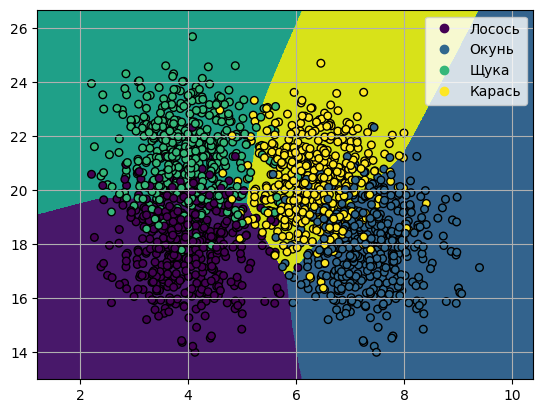

In [19]:
draw_graph(model, data, ident)